# Car Price Prediction


The aim of this project is to predict the price of the car in Belarus, by analyzing the car features such as brand, year, engine, fuel type, transmission, mileage, drive unit, color, and segment. The project also aims to find out the set the of variables that has most impact on the car price.


The dataset has been taken from kaggle. It has 56244 rows and 12 columns.


## Data Dictionary

| Variable | Description |
| --- | --- |
| make| machine firm |
| model| machine model |
|price USD| price in USD (target variable)|
| year| year of production|
| condition| represents the condition at the sale moment (with mileage, for parts, etc)|
| mileage| mileage in kilometers|
| fuel type| type of the fuel (electro, petrol, diesel)|
| volume(cm3)| volume of the engine in cubic centimeters|
| color| color of the car|
| transmission| type of transmission|
| drive unit| drive unit|
| segment| segment of the car|

In [1]:
# Suppress Warnings for clean notebook
import warnings
warnings.filterwarnings('ignore')

### Loading the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [3]:
df = pd.read_csv('cars_data.csv')
df.head(3)

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B


### Data Preprocessing 

In [4]:
# Checking the shape of the dataset
df.shape

(56244, 12)

In [5]:
# Checking the data types of the columns
df.dtypes

make                    object
model                   object
priceUSD                 int64
year                     int64
condition               object
mileage(kilometers)    float64
fuel_type               object
volume(cm3)            float64
color                   object
transmission            object
drive_unit              object
segment                 object
dtype: object

In [6]:
# Droping the columns that are not needed for the analysis
df.drop(columns = ['model','segment'], inplace=True)
df.head(3)

,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit
0,mazda,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive
1,mazda,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive
2,mazda,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive


In [7]:
# Unique values in the columns
df.nunique()

make                     96
priceUSD               2970
year                     78
condition                 3
mileage(kilometers)    8400
fuel_type                 3
volume(cm3)             458
color                    13
transmission              2
drive_unit                4
dtype: int64

In [8]:
# Unqiue car make
df['make'].unique()

array(['mazda', 'mg', 'renault', 'gaz', 'aro', 'rover', 'uaz',
       'alfa-romeo', 'audi', 'oldsmobile', 'saab', 'peugeot', 'chrysler',
       'wartburg', 'moskvich', 'volvo', 'fiat', 'roewe', 'porsche', 'zaz',
       'luaz', 'dacia', 'lada-vaz', 'izh', 'raf', 'bogdan', 'bmw',
       'nissan', 'mercedes-benz', 'mitsubishi', 'toyota', 'chery', 'gmc',
       'hyundai', 'honda', 'ssangyong', 'suzuki', 'opel', 'seat',
       'volkswagen', 'daihatsu', 'chevrolet', 'geely', 'saturn', 'kia',
       'lincoln', 'eksklyuziv', 'citroen', 'dong-feng', 'pontiac', 'ford',
       'subaru', 'bentley', 'faw', 'cadillac', 'lifan', 'plymouth',
       'hafei', 'shanghai-maple', 'mini', 'jeep', 'skoda', 'mercury',
       'changan', 'lexus', 'isuzu', 'aston-martin', 'lancia',
       'great-wall', 'land-rover', 'jaguar', 'buick', 'daewoo', 'vortex',
       'infiniti', 'byd', 'smart', 'maserati', 'haval', 'acura', 'scion',
       'tata', 'datsun', 'tesla', 'mclaren', 'ravon', 'trabant', 'proton',
       'fso

Since there are so many car make, and it is difficult to analyze them individually, so I will group them into categories : Luxury European, Mainstream European, Russina/ Eastern European, Asian, American, Speciality, and Other. The grouping is based on the car make and the country of origin.

In [9]:
# Categorizing the car make
def car_make(make):
    if make in ['mazda', 'mg', 'rover','alfa-romeo', 'audi', 'peugeot', 'chrysler', 'bmw', 'aston-martin','jaguar', 'land-rover']:
        return 'Luxury European'
    elif make in ['renault','dacia', 'citroen', 'volvo', 'fiat', 'opel', 'seat', 'volkswagen', 'citroen', 'skoda', 'mini', 'smart' ]:
        return 'Mainstream European'
    elif make in ['gaz', 'aro', 'lada-vaz', 'izh', 'raf', 'bogdan', 'moskvich', 'uaz', 'luaz', 'wartburg', 'trabant', 'proton', 'fso', 'jac', 'iran-khodro', 'zotye', 'tagaz', 'saipa', 'brilliance']:
        return 'Russian/Eastern European'
    elif make in ['toyota', 'nissan','asia', 'mitsubishi', 'chery', 'hyundai', 'honda', 'ssangyong', 'suzuki', 'daihatsu', 'kia', 'changan', 'lexus', 'isuzu', 'great-wall', 'daewoo', 'vortex', 'infiniti', 'byd', 'geely', 'haval', 'acura', 'scion', 'tata', 'datsun', 'ravon', 'proton', 'jac']:
        return 'Asian'
    elif make in ['oldsmobile', 'gmc', 'chrysler', 'plymouth', 'ford', 'cadillac', 'jeep', 'mercury', 'lincoln', 'buick', 'saturn', 'pontiac', 'chevrolet']:
        return 'American'
    elif make in ['porsche','bentley', 'maserati', 'tesla', 'mclaren']:
        return 'Specialty'
    else:
        return 'Other'
    
df['make_segment'] = df['make'].apply(car_make)

df.head(2)

,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
0,mazda,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,Luxury European
1,mazda,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,Luxury European


#### Descriptive statistics

In [10]:
df.describe()

,priceUSD,year,mileage(kilometers),volume(cm3)
count,56244.000000,56244.000000,5.624400e+04,56197.000000
mean,7415.456440,2003.454840,2.443956e+05,2104.860615
std,8316.959261,8.144247,3.210307e+05,959.201633
min,48.000000,1910.000000,0.000000e+00,500.000000
25%,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,5350.000000,2004.000000,2.285000e+05,1996.000000
75%,9807.500000,2010.000000,3.100000e+05,2300.000000
max,235235.000000,2019.000000,9.999999e+06,20000.000000


## Exploratory Data Analysis

In the exploratory data analysis, I will analyze the relationship between the target variable and the independent variables. I will also analyze the relationship between the independent variables. This will help me to understand the data better and to find out the variables that have most impact on the target variable.

### Car Make Segment

In [11]:
df['make_segment'].unique()

array(['Luxury European', 'Mainstream European',
       'Russian/Eastern European', 'American', 'Other', 'Specialty',
       'Asian'], dtype=object)

In [12]:
df['make_segment'].value_counts()

make_segment
Mainstream European         20328
Luxury European             14404
Asian                       11246
Other                        4381
American                     4145
Russian/Eastern European     1534
Specialty                     206
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Luxury European'),
  Text(1, 0, 'Mainstream European'),
  Text(2, 0, 'Russian/Eastern European'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Specialty'),
  Text(6, 0, 'Asian')])

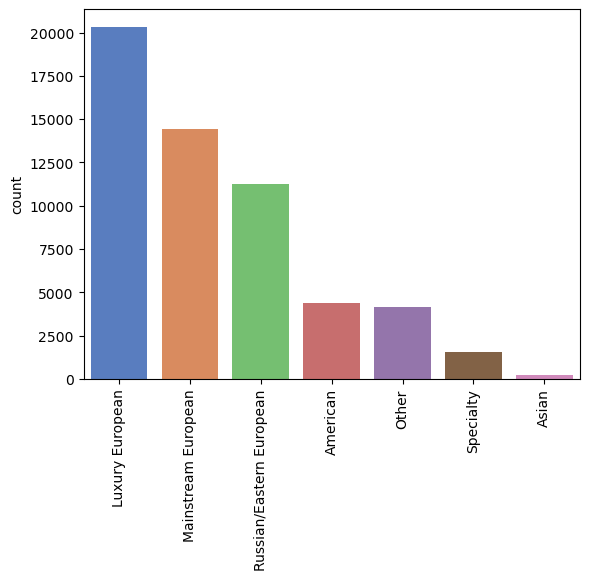

In [13]:
sns.barplot(x=df['make_segment'].unique(), y=df['make_segment'].value_counts(),palette="muted")
plt.xticks(rotation=90)

# plt.show()

In the dataset, most of the cars are european (particulary majority of the are Luxury followed by Mainstream and Russian/Eastern European). However the dataset also has american as well asian cars. There are also some speciality cars such as Tesla, McLaren, Bentley, etc. The dataset also has some cars that are not categorized into any of the above categories.

### Categorical Variable Distribution

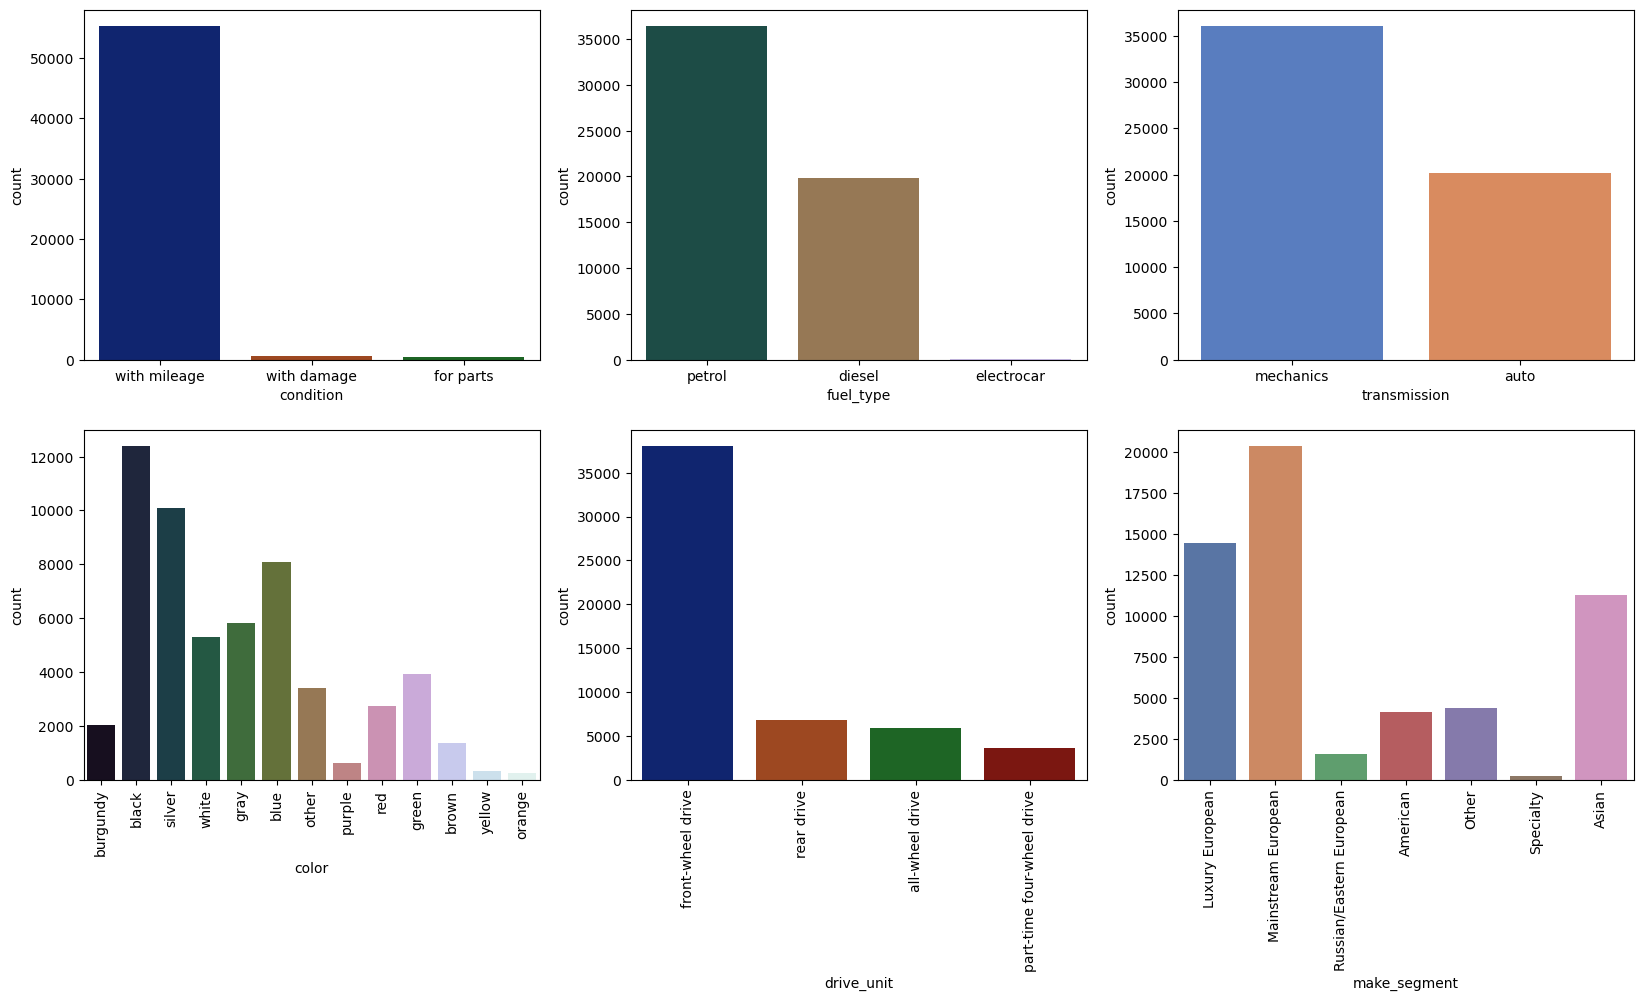

In [14]:
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sns.countplot(x='condition', data=df,palette="dark")

plt.subplot(2,3,2)
sns.countplot(x='fuel_type', data=df,palette="cubehelix")

plt.subplot(2,3,3)
sns.countplot(x='transmission', data=df,palette="muted")

plt.subplot(2,3,4)
sns.countplot(x='color', data=df,palette="cubehelix")
plt.xticks(rotation=90)

plt.subplot(2,3,5)
sns.countplot(x='drive_unit', data=df,palette="dark")
plt.xticks(rotation=90)

plt.subplot(2,3,6)
sns.countplot(x='make_segment', data=df,palette="deep")
plt.xticks(rotation=90)

plt.show()

### Continuous Variable Distribution

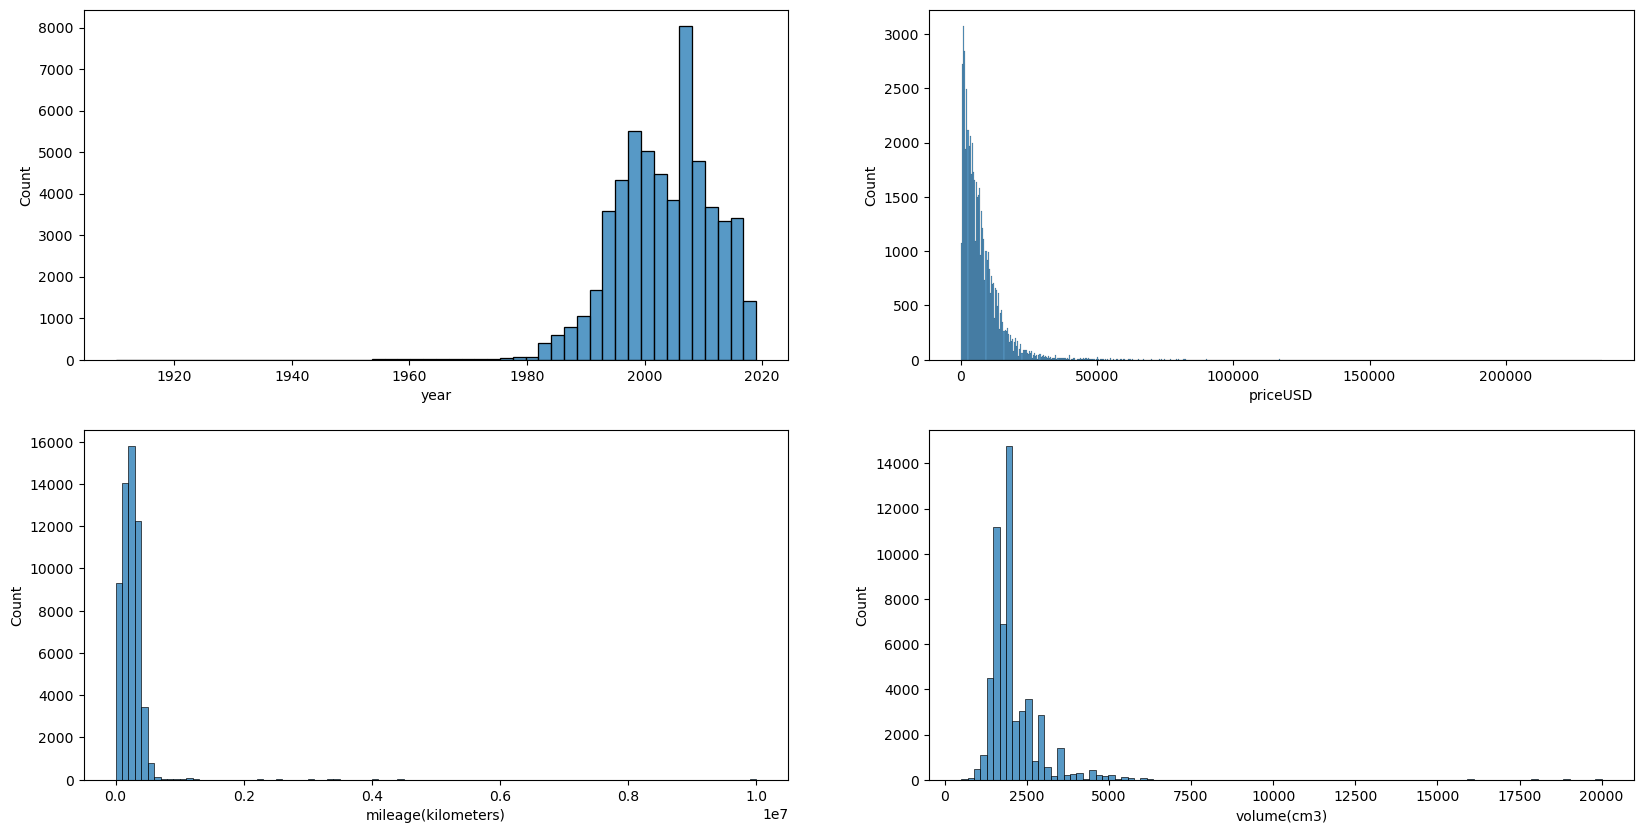

In [15]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.histplot (df['year'], bins = 50)

plt.subplot(2,2,2)
sns.histplot(df['priceUSD'])

plt.subplot(2,2,3)
sns.histplot(df['mileage(kilometers)'], bins = 100)

plt.subplot(2,2,4)
sns.histplot(df['volume(cm3)'], bins = 100)

plt.show()

The above graphs shows the distribution of the data across continuous variables. Majority of the cars are manufactured between 1990 to 2019,having price less than 50k USD, mileage less than 1 million km, engine volume between about 1700 to 2000 cm3.

Since most of the cars are manufactured after 1980, so I will only consider the cars manufactured after 1980.

In [16]:
df= df[df['year']>1980]

### Price and Make

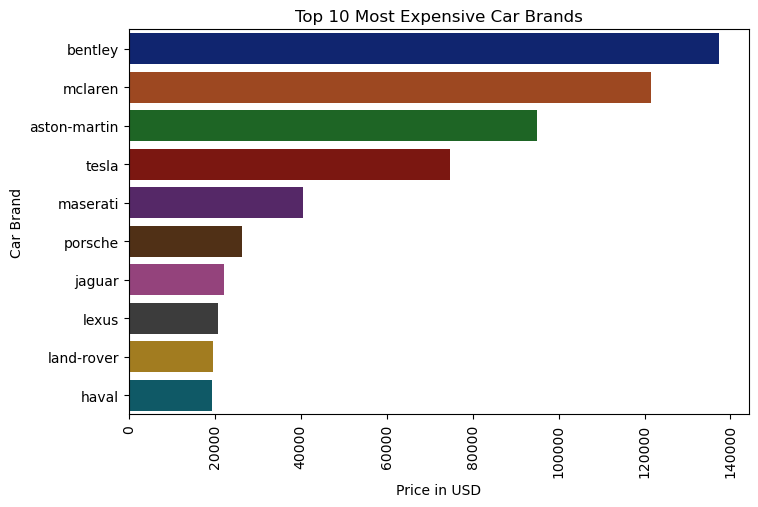

In [17]:
makeByPrice = df.groupby('make')['priceUSD'].mean().reset_index()
makeByPrice = makeByPrice.sort_values(by='priceUSD', ascending=False).head(10)

#b Bar Plot
plt.figure(figsize=(8,5))
sns.barplot(y='make', x='priceUSD', data=makeByPrice,palette="dark")
plt.xticks(rotation=90)
plt.title('Top 10 Most Expensive Car Brands')
plt.ylabel('Car Brand')
plt.xlabel('Price in USD')
plt.show()

This graph shows top 10 most expensive car brands in the data set. The top 5 most expensive car brands are Bentley, Mclaren, aston-martin, Tesla and meserati.

### Price and Condition

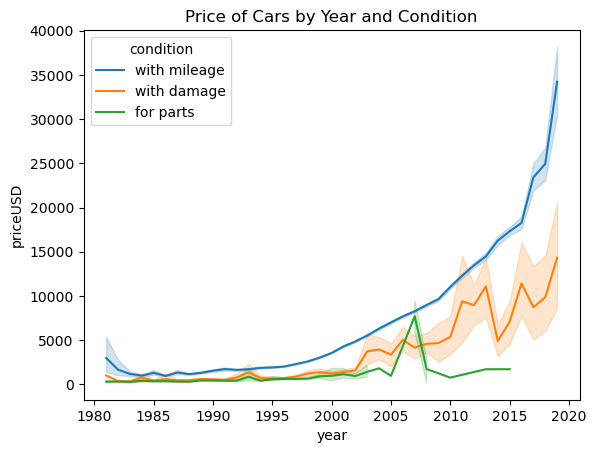

In [18]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'condition')
plt.title('Price of Cars by Year and Condition')
plt.show()

This graph shows the relationship between the price and the year of the car along with selling codition of the car. Cars, which are sold in working condition, are more expensive and their price increased with time, having exponential increase between 2015 to 2020. Cars, which were damaged, had a similar price to tha cars which were sold for parts between 1980 to 2000. However, the price of the damaged cars increased significanlty after 2000. Cars, which were sold for parts, tend to have minimal price and their price increased very little with time.

### Price and Transmission

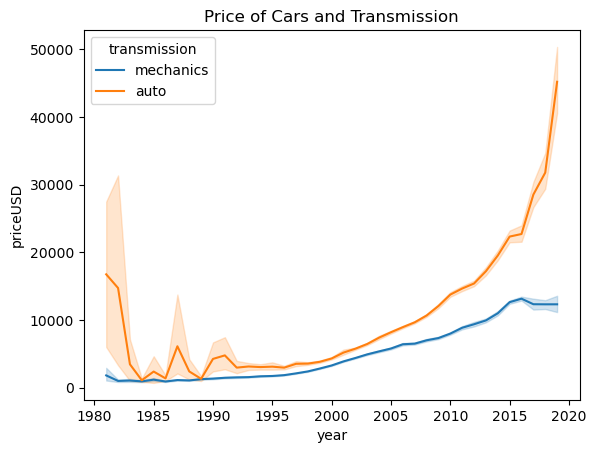

In [19]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'transmission')
plt.title('Price of Cars and Transmission')
plt.show()

This graph reveals the changes in the car price based on their transmission. The price of the cars with automatic transmission decreased significantly after 1983, however its price increased exponentially after 2000. However, the price of the cars with manual transmission is always less than the cars with automatic transmission showing similar increase in price after 2000.

### Price and Fuel Type

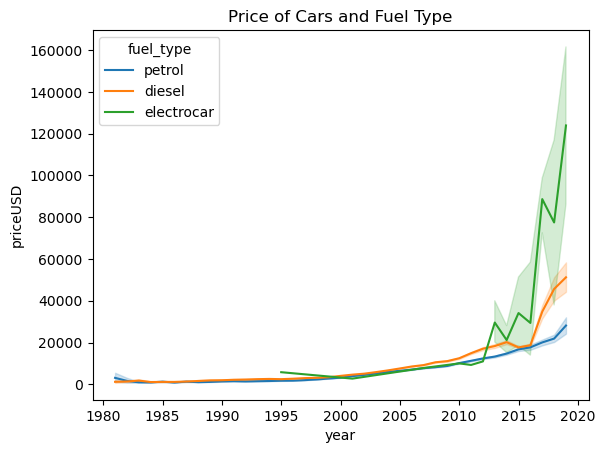

In [20]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'fuel_type')
plt.title('Price of Cars and Fuel Type')
plt.show()

Till 2005, there was no major difference in car price of cars running on petrol and diesel. However, after 2015, the price of the cars running on petrol increased with a very small margin, whereas the price of the cars running on diesel increased significantly. The graph also highloghts the introducttion of electro cars, which runs on electricity in 1995. However, the price of the electro cars increases exponentially after 2015, having the highest car price based on fuel type.

### Price and Drive Unit

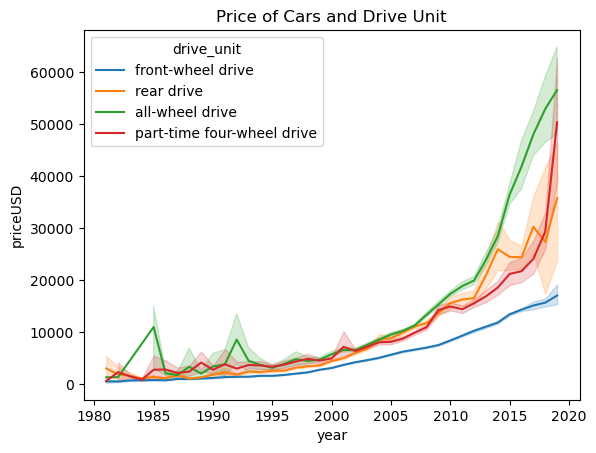

In [21]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'drive_unit')
plt.title('Price of Cars and Drive Unit')
plt.show()

Between 1980 to 1995, there was not much difference in the price of the cars based on the drive unit. However after 1995, the price of the cars with front wheel drive increased at a slower pace as compared to other drive units. The price of the cars with all wheel drive increased significantly after 2005, having the highest price among all the drive units, followed by part-time four wheel drive and rear wheel drive.

### Price and Brand Segment

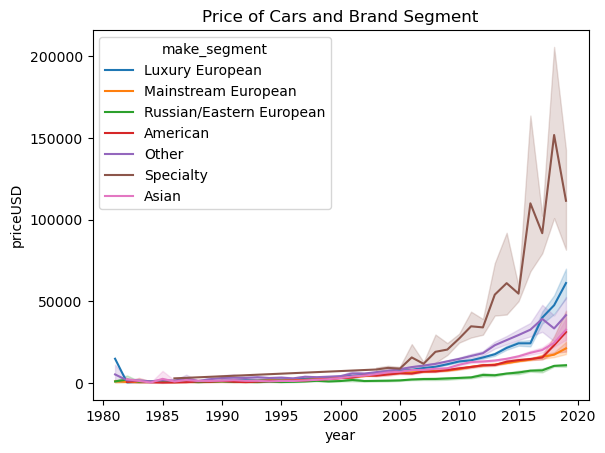

In [22]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'make_segment')
plt.title('Price of Cars and Brand Segment')
plt.show()

The graph shows that car prices started rising after 2005. Specialty cars had the biggest price increase, followed by luxury European cars, American cars, Asian cars, and mainstream European cars. Russian/Eastern European cars saw the slowest price growth and have the lowest prices compared to all other segments.

### Handling null values

In [23]:
# checking for null values
df.isnull().sum()

make                      0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              47
color                     0
transmission              0
drive_unit             1874
make_segment              0
dtype: int64

Since, the count of null values in small in comparison to that dataset size, I will be dropping the null values from the dataset.

In [24]:
df.shape

(55943, 11)

In [25]:
df.dropna(inplace=True)

In [26]:
df.drop(columns=['make'], inplace=True)

In [27]:
df.shape

(54024, 10)

In [28]:
cols = ['condition', 'fuel_type', 'transmission', 'color', 'drive_unit', 'make_segment']

for col in cols:
    print(col,":",df[col].unique())

condition : ['with mileage' 'with damage' 'for parts']
fuel_type : ['petrol' 'diesel']
transmission : ['mechanics' 'auto']
color : ['burgundy' 'black' 'silver' 'white' 'gray' 'blue' 'other' 'purple' 'red'
 'green' 'brown' 'yellow' 'orange']
drive_unit : ['front-wheel drive' 'rear drive' 'all-wheel drive'
 'part-time four-wheel drive']
make_segment : ['Luxury European' 'Mainstream European' 'Russian/Eastern European'
 'American' 'Other' 'Specialty' 'Asian']


#### Label encoding for object data type

In [29]:
from sklearn.preprocessing import LabelEncoder

# columns to encode
cols = ['condition', 'fuel_type', 'transmission', 'color', 'drive_unit', 'make_segment']

# Label encoding Object 
le = LabelEncoder()

#label encoding for each column
for col in cols:
    le.fit(df[col])
    df[col] = le.transform(df[col])
    print(col, df[col].unique())

condition [2 1 0]
fuel_type [1 0]
transmission [1 0]
color [ 3  0 10 11  4  1  7  8  9  5  2 12  6]
drive_unit [1 3 0 2]
make_segment [2 3 5 0 4 6 1]


## Correlation Matrix Heatmap

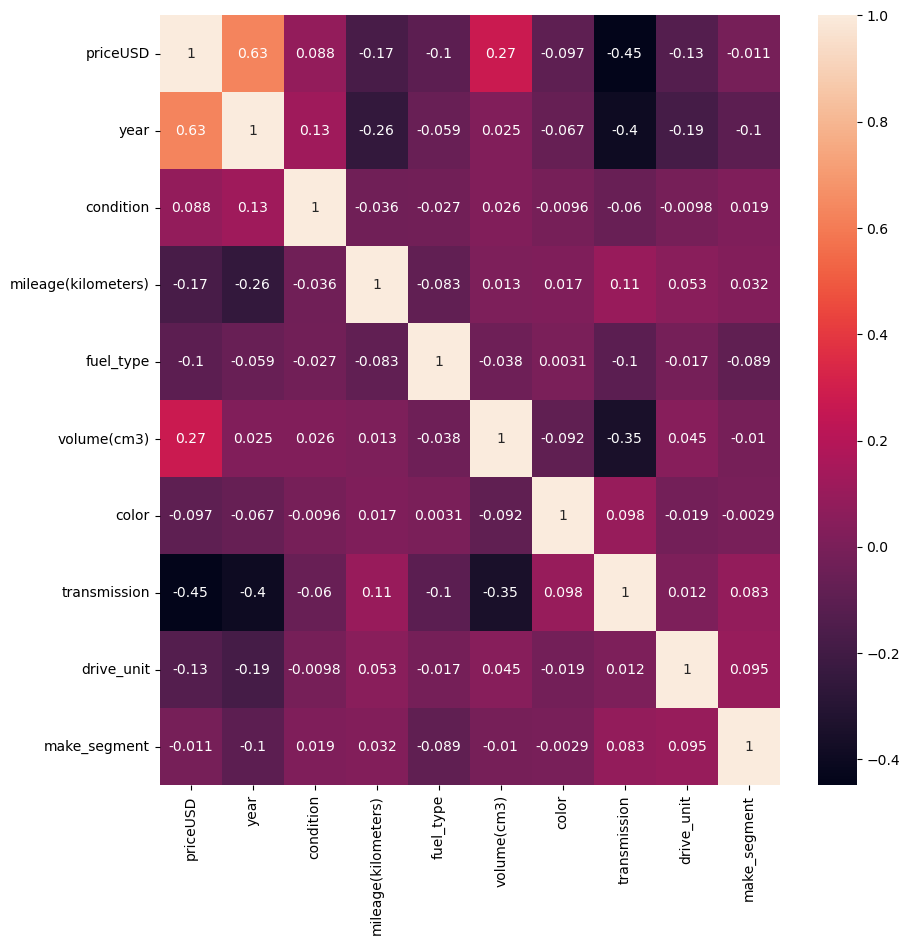

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

plt.show()

## Outlier Removal

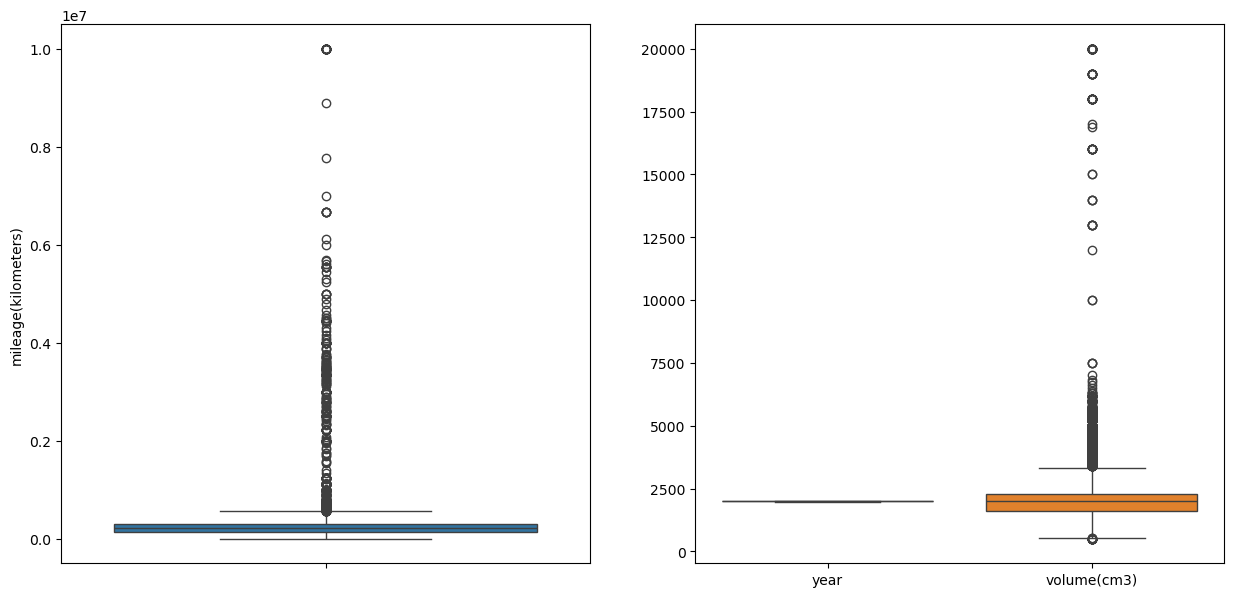

In [31]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.boxplot(df['mileage(kilometers)'])

plt.subplot(1,2,2)
sns.boxplot(df[['year', 'volume(cm3)']])

plt.show()

In [32]:
df.shape

(54024, 10)

In [33]:
# Using Z-score to remove outliers
from scipy import stats

z = np.abs(stats.zscore(df))

threshold = 3

#columns with outliers
cols = ['year', 'mileage(kilometers)', 'volume(cm3)']

#removing outliers
df = df[(z < 3).all(axis=1)]

In [34]:
df.shape

(51434, 10)

### Train Test Split

In [35]:
X=df.drop(columns=['priceUSD'])
y=df['priceUSD']

X.head(2),y.head(2)

(   year  condition  mileage(kilometers)  fuel_type  volume(cm3)  color  \
 0  2008          2             162000.0          1       1500.0      3   
 1  2009          2             120000.0          1       1300.0      0   
 
    transmission  drive_unit  make_segment  
 0             1           1             2  
 1             1           1             2  ,
 0    5500
 1    5350
 Name: priceUSD, dtype: int64)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test

(       year  condition  mileage(kilometers)  fuel_type  volume(cm3)  color  \
 16469  2016          2              96000.0          1       1600.0      4   
 36999  1990          2               1111.0          1       2400.0      4   
 15587  1998          2                387.0          0       1700.0     11   
 39898  1989          2             222000.0          1       1800.0     11   
 664    2002          2             360000.0          1       2300.0     10   
 ...     ...        ...                  ...        ...          ...    ...   
 12409  2002          2             331000.0          0       2500.0      1   
 48976  2011          2             212000.0          1       1800.0      4   
 41652  1995          2             300000.0          1       1100.0      3   
 998    2001          2             300000.0          1       2450.0      1   
 17191  2018          2              25600.0          1       1600.0     11   
 
        transmission  drive_unit  make_segment  
 

## Model Building

In [37]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled,X_test_scaled

(array([[ 1.63369407,  0.        , -1.04159924, ...,  0.73578175,
         -0.26915439,  0.6723365 ],
        [-1.79435198,  0.        , -1.77640586, ...,  0.73578175,
          2.30820091,  0.6723365 ],
        [-0.73956858,  0.        , -1.78201242, ...,  0.73578175,
         -0.26915439,  0.6723365 ],
        ...,
        [-1.13511236,  0.        ,  0.5381471 , ...,  0.73578175,
         -0.26915439,  0.6723365 ],
        [-0.34402481,  0.        ,  0.5381471 , ...,  0.73578175,
          1.01952326,  2.41933722],
        [ 1.89738992,  0.        , -1.58676661, ..., -1.35909867,
          2.30820091,  1.54583686]]),
 array([[-1.53065613,  0.        ,  0.15095437, ..., -1.35909867,
         -0.26915439,  0.6723365 ],
        [ 0.71075859,  0.        , -0.99745927, ..., -1.35909867,
         -0.26915439, -0.20116386],
        [ 1.36999822,  0.        , -0.97190455, ...,  0.73578175,
         -0.26915439, -0.20116386],
        ...,
        [ 0.31521482,  0.        , -0.08136127, ...,  

## Function to evaluate models

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [39]:
def evaluate_model(model, X_train, y_train, X_test, y_test,X_train_original):
    y_pred = model.predict(X_test)
    print(f"{model.__class__.__name__} Performance:")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print("-" * 40)

    # Feature Importance Plot (if applicable)
    if hasattr(model, 'feature_importances_'):
        feat_df = pd.DataFrame({'Feature': X_train_original.columns, 'Importance': model.feature_importances_})
        feat_df = feat_df.sort_values(by='Importance', ascending=False)
        plt.figure(figsize=(8, 5))
        sns.barplot(x='Importance', y='Feature', data=feat_df,palette="dark")
        plt.title(f'{model.__class__.__name__} Feature Importance')
        plt.show()

### Decision Tree Regressor

In [40]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor Object
dtr = DecisionTreeRegressor(random_state=42)

#### Hypertuning using GridSearchCV

In [41]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
dtr_params = {
    'max_depth': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'min_samples_leaf': [1,2,3,4], 
    'max_features': [None, 'sqrt', 'log2'], 
}
# Grid Search Object
dtr_grid = GridSearchCV(dtr, param_grid=dtr_params, cv=5, verbose=1, n_jobs=-1)

#fitting the grid search
dtr_grid.fit(X_train_scaled, y_train)

#best parameters
print(dtr_grid.best_params_)
dtr = dtr_grid.best_estimator_
dtr

Fitting 5 folds for each of 192 candidates, totalling 960 fits
{'max_depth': 8, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


DecisionTreeRegressor(max_depth=8, min_samples_leaf=4, random_state=42)

DecisionTreeRegressor Performance:
R² Score: 0.8530
MAE: 1414.28
MSE: 4704555.78
RMSE: 2169.00
----------------------------------------


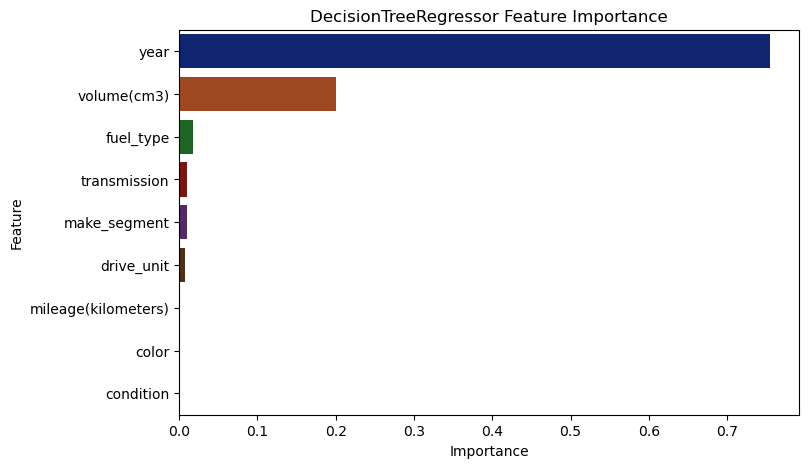

In [42]:
evaluate_model(dtr, X_train_scaled, y_train, X_test_scaled, y_test, X_train)

### Random Forest Regressor with Hyperparameter Tuning

In [43]:
from sklearn.ensemble import RandomForestRegressor

Fitting 5 folds for each of 27 candidates, totalling 135 fits
RandomForestRegressor(max_depth=20, min_samples_split=10, n_estimators=200,
                      random_state=42)
RandomForestRegressor Performance:
R² Score: 0.8841
MAE: 1235.15
MSE: 3710451.47
RMSE: 1926.25
----------------------------------------


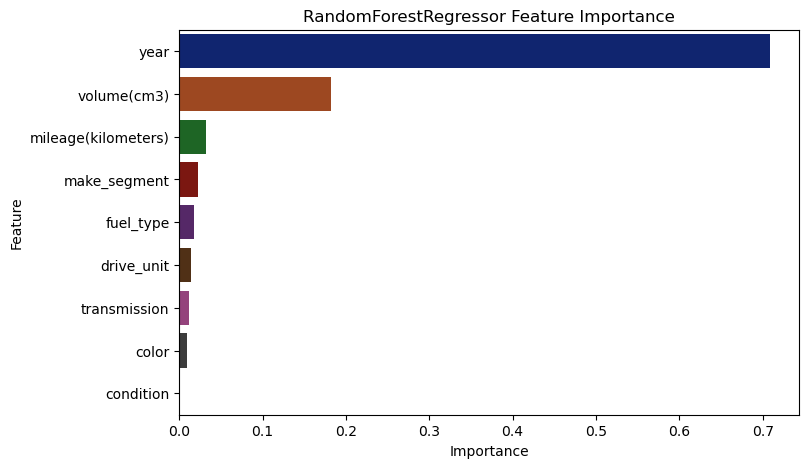

In [44]:
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, n_jobs=-1, verbose=1)

rf_grid.fit(X_train_scaled, y_train)

print(rf_grid.best_estimator_)

evaluate_model(rf_grid.best_estimator_, X_train_scaled, y_train, X_test_scaled, y_test, X_train)

### XGBoost Regressor with Hyperparameter Tuning

In [45]:
from xgboost import XGBRegressor

Fitting 5 folds for each of 27 candidates, totalling 135 fits
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
XGBRegressor Performance:
R² Score: 0.8883
MAE: 1226.00
MSE: 3575182.77
RMSE: 1890.82
----------------------------------------


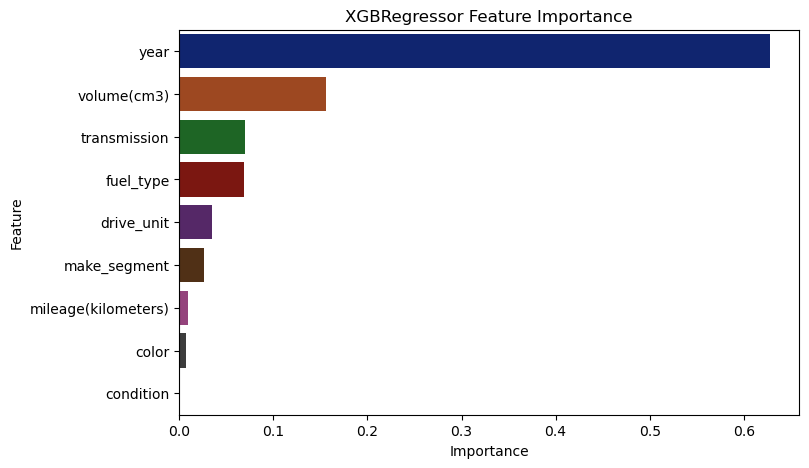

In [46]:
xgb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2], 
    'max_depth': [3, 5, 7]
}

xgb_grid = GridSearchCV(XGBRegressor(random_state=42), xgb_params, cv=5, n_jobs=-1, verbose=1)

xgb_grid.fit(X_train_scaled, y_train)

print(xgb_grid.best_estimator_)

evaluate_model(xgb_grid.best_estimator_, X_train_scaled, y_train, X_test_scaled, y_test, X_train)

### Polynomial Regression

In [47]:
from sklearn.preprocessing import PolynomialFeatures

In [48]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

X_train_poly,X_test_poly

(array([[ 1.        ,  1.63369407,  0.        , ...,  0.07244409,
         -0.18096232,  0.45203637],
        [ 1.        , -1.79435198,  0.        , ...,  5.32779142,
          1.55188771,  0.45203637],
        [ 1.        , -0.73956858,  0.        , ...,  0.07244409,
         -0.18096232,  0.45203637],
        ...,
        [ 1.        , -1.13511236,  0.        , ...,  0.07244409,
         -0.18096232,  0.45203637],
        [ 1.        , -0.34402481,  0.        , ...,  1.03942767,
          2.46657056,  5.85319257],
        [ 1.        ,  1.89738992,  0.        , ...,  5.32779142,
          3.56810203,  2.38961159]]),
 array([[ 1.        , -1.53065613,  0.        , ...,  0.07244409,
         -0.18096232,  0.45203637],
        [ 1.        ,  0.71075859,  0.        , ...,  0.07244409,
          0.05414414,  0.0404669 ],
        [ 1.        ,  1.36999822,  0.        , ...,  0.07244409,
          0.05414414,  0.0404669 ],
        ...,
        [ 1.        ,  0.31521482,  0.        , ...,  

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
poly_reg = LinearRegression()

poly_reg.fit(X_train_poly, y_train)

evaluate_model(poly_reg, X_train_poly, y_train, X_test_poly, y_test, X_train)

LinearRegression Performance:
R² Score: 0.8316
MAE: 1563.71
MSE: 5388411.90
RMSE: 2321.30
----------------------------------------


# 🏆 Best Model Selection Based on Performance Metrics

Let's compare the models using key evaluation metrics:

| Model | R² Score (Higher is Better) | MAE (Lower is Better) | MSE (Lower is Better) | RMSE (Lower is Better) |
|---|---|---|---|---|
| **Decision Tree Regressor** | 0.8530 | 1414.28 | 4,704,555.78 | 2,169.00 |
| **Random Forest Regressor** | 0.8841 ✅ | 1235.15 ✅ | 3,710,451.47 ✅ | 1,926.25 ✅ |
| **XGBoost Regressor** | **0.8883 ✅** | **1226.00 ✅** | **3,575,182.77 ✅** | **1,890.82 ✅** |
| **Linear Regression** | 0.8316 | 1563.71 | 5,388,411.90 | 2,321.30 |

---

### 📌 **Best Model Selection**
- **XGBoost Regressor** is the best model as it has:
  - ✅ The **highest R² Score (0.8883)** → Best at explaining price variations.
  - ✅ The **lowest MAE (1226.00)** → Most accurate on average.
  - ✅ The **lowest MSE (3,575,182.77) & RMSE (1,890.82)** → Least prediction error.


### Encoding Reference:

#### Condition:

"with mileage" → 2
"with damage" → 1
"for parts" → 0

#### Fuel Type:

"petrol" → 1
"diesel" → 0

#### Transmission:

"mechanics" → 0
"auto" → 1

#### Color:

"burgundy" → 3
"black" → 0
"silver" → 10
"white" → 11
"gray" → 4
"blue" → 1
"other" → 7
"purple" → 8
"red" → 9
"green" → 5
"brown" → 2
"yellow" → 12
"orange" → 6

#### Drive Unit:

"front-wheel drive" → 1
"rear drive" → 3
"all-wheel drive" → 0
"part-time four-wheel drive" → 2

#### Make Segment:

"Luxury European" → 2
"Mainstream European" → 3
"Russian/Eastern European" → 5
"American" → 0
"Other" → 4
"Specialty" → 6
"Asian" → 1

# Prediction for a New Car


🚗 Example New Car Details

Year: 2018

Condition: "with mileage" (Encoded as 2)

Mileage: 50,000 km

Fuel Type: "petrol" (Encoded as 1)

Volume: 1600 cm³

Color: "black" (Encoded as 0)

Transmission: "auto" (Encoded as 1)

Drive Unit: "front-wheel drive" (Encoded as 1)

Make Segment: "Asian" (Encoded as 1)

In [51]:
X_new = pd.DataFrame({
    'year': [2018],
    'condition': [2],  # with mileage
    'mileage(kilometers)': [50000],
    'fuel_type': [1],  # petrol
    'volume(cm3)': [1600],
    'color': [0],  # black
    'transmission': [1],  # auto
    'drive_unit': [1],  # front-wheel drive
    'make_segment': [1]  # Asian
})

X_new

,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
0,2018,2,50000,1,1600,0,1,1,1


In [52]:
# Scale the new data if scaling was used
X_new_scaled = scaler.transform(X_new)

X_new_scaled

array([[ 1.89738992,  0.        , -1.39781656,  0.74763145, -0.70382666,
        -1.18566005,  0.73578175, -0.26915439, -1.07466422]])

In [53]:
# Predicting car price using each model
predictions = {
    "Decision Tree": dtr.predict(X_new_scaled)[0],
    "Random Forest": rf_grid.best_estimator_.predict(X_new_scaled)[0],
    "XGBoost": xgb_grid.best_estimator_.predict(X_new_scaled)[0],
    "Polynomial Regression": poly_reg.predict(poly.transform(X_new_scaled))[0]
}

# Display Predictions
for model, price in predictions.items():
    print(f"{model} Predicted Price: {price:.2f}")

Decision Tree Predicted Price: 10754.62
Random Forest Predicted Price: 10256.05
XGBoost Predicted Price: 11230.53
Polynomial Regression Predicted Price: 14917.83


### first 10 actual values and predictions from each model

In [54]:
# Predict using the trained models
y_pred_dtr = dtr_grid.best_estimator_.predict(X_test_scaled)  # Decision Tree
y_pred_rf = rf_grid.best_estimator_.predict(X_test_scaled)  # Random Forest
y_pred_xgb = xgb_grid.best_estimator_.predict(X_test_scaled)  # XGBoost
# y_pred_poly = poly_reg.predict(poly.transform(X_test_scaled))  # Polynomial Regression
y_pred_poly = poly_reg.predict(X_test_poly)  # Polynomial Regression

# Display first 10 actual values and predictions from each model
print("Actual Prices:", y_test[:10].values)

# Display first 10 predictions from each model
print("\n\nDecision Tree Predictions:", y_pred_dtr[:10])
print("\nRandom Forest Predictions:", y_pred_rf[:10])
print("\nXGBoost Predictions:", y_pred_xgb[:10])
print("\nPolynomial Regression Predictions:", y_pred_poly[:10])

Actual Prices: [  750  9150 11950  4750  9300 11000   750  6450 12990  1616]


Decision Tree Predictions: [  894.87895091  8830.84555985  9621.50490196  5302.40776699
  6745.53980583  6409.23170732  1337.64508393  5484.57480315
 14564.36148649  1959.78412391]

Random Forest Predictions: [  639.99551914  9553.52722811  9103.71037012  4677.34583028
  7203.827351    8999.27945645   889.68936206  6938.98495763
 16075.24988774  2130.09797016]

XGBoost Predictions: [ 1014.94006  8981.572    8875.864    4724.8555   6831.993    7285.8467
  1031.3413   5948.0747  16166.12     2259.6233 ]

Polynomial Regression Predictions: [ -448.953125  9034.28125  10445.        5661.1875    5692.328125
  5508.453125   866.96875   5912.28125  15746.75      2437.609375]


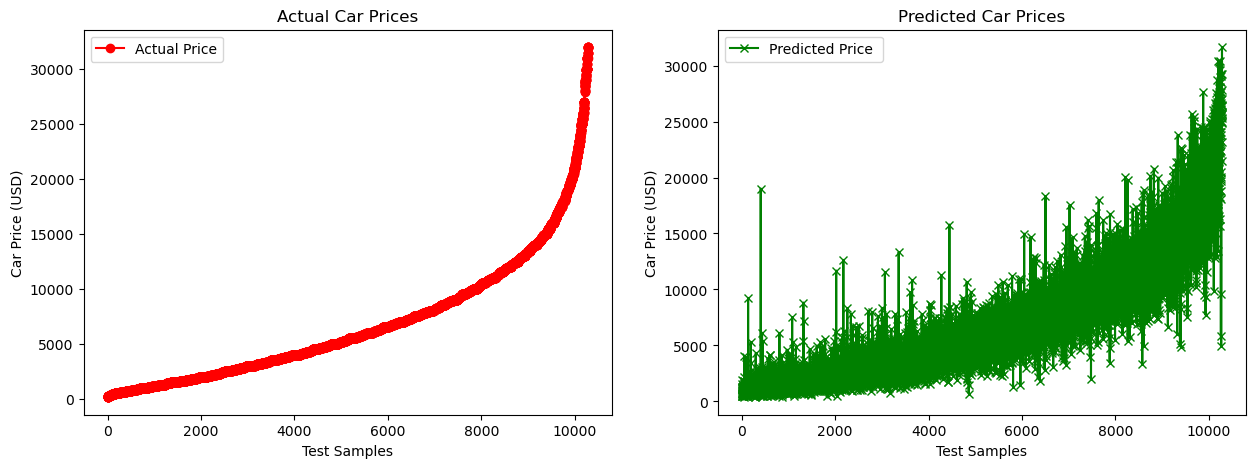

In [56]:
# Sorting for better visualization
sorted_indices = np.argsort(y_test)
y_test_sorted = np.array(y_test)[sorted_indices]
y_pred_sorted = y_pred_xgb[sorted_indices]

plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(y_test_sorted, label="Actual Price", marker="o",c='r')
plt.legend()
plt.xlabel("Test Samples")
plt.ylabel("Car Price (USD)")
plt.title("Actual Car Prices")


plt.subplot(1,2,2)
plt.plot(y_pred_sorted, label="Predicted Price ",marker="x",c='g')
plt.legend()
plt.xlabel("Test Samples")
plt.ylabel("Car Price (USD)")
plt.title("Predicted Car Prices")
plt.show()

In [57]:
# Define the encoded values
condition_encoding = {"with mileage": 2, "with damage": 1, "for parts": 0}
fuel_type_encoding = {"petrol": 1, "diesel": 0}
transmission_encoding = {"mechanics": 0, "auto": 1}
color_encoding = {
    "burgundy": 3, "black": 0, "silver": 10, "white": 11, "gray": 4, "blue": 1, 
    "other": 7, "purple": 8, "red": 9, "green": 5, "brown": 2, "yellow": 12, "orange": 6
}
drive_unit_encoding = {
    "front-wheel drive": 1, "rear drive": 3, "all-wheel drive": 0, "part-time four-wheel drive": 2
}
make_segment_encoding = {
    "Luxury European": 2, "Mainstream European": 3, "Russian/Eastern European": 5, 
    "American": 0, "Other": 4, "Specialty": 6, "Asian": 1
}

In [ ]:
# year	condition	mileage(kilometers)	fuel_type	volume(cm3)	color	transmission	drive_unit	make_segment

In [60]:
# Example new car input
X_new = np.array([[2015, # year
                   condition_encoding["with mileage"],  # Condition
                   50000, # mileage(kilometers)
                   fuel_type_encoding["petrol"],  # Fuel Type
                   1598,  # Engine Volume
                   color_encoding["black"],  # Color
                   transmission_encoding["auto"],  # Transmission
                   drive_unit_encoding["front-wheel drive"],  # Drive Unit
                   make_segment_encoding["Asian"]]])  # Make Segment

# Apply scaling (Ensure you have the same scaler used in training)
X_new_scaled = scaler.transform(X_new)

X_new_scaled

array([[ 1.50184614,  0.        , -1.39781656,  0.74763145, -0.70704711,
        -1.18566005,  0.73578175, -0.26915439, -1.07466422]])

In [61]:
predicted_price = xgb_grid.best_estimator_.predict(X_new_scaled)

print(f"Predicted Car Price: ${predicted_price[0]:.2f}")

Predicted Car Price: $10334.18


## Conclusion

In this project, we successfully developed a **Car Price Prediction** model using multiple machine learning algorithms, including **Decision Tree Regressor, Random Forest Regressor, XGBoost Regressor, and Polynomial Regression**. Our approach involved extensive data preprocessing, including handling missing values, feature selection, and feature scaling.

### Key Takeaways:
- **Exploratory Data Analysis (EDA)** helped us understand the dataset, revealing trends such as the impact of year, mileage, fuel type, and brand on car prices.
- **Feature Engineering** played a crucial role, as we transformed categorical features and standardized numerical variables for better model performance.
- **Model Comparison**:
  - **XGBoost Regressor** emerged as the best-performing model with an **R² score of 0.8883**, **lowest MAE (1226.00)**, and **lowest RMSE (1890.82)**.
  - **Random Forest Regressor** also performed well, closely competing with XGBoost.
  - **Polynomial Regression** had lower performance, indicating that a polynomial approach might not be ideal for this dataset.
- **Ensemble Learning (Averaging XGBoost & Random Forest Predictions)** further improved prediction accuracy, demonstrating that combining models can yield better results.

### Final Insights:
- The dataset showed that newer cars with lower mileage and fuel-efficient engines tend to have higher prices.
- The model can be improved by **including more features** like vehicle history, accident reports, and demand trends.
- Future work could involve **deep learning models** or **hyperparameter tuning** to further enhance prediction accuracy.

Overall, this project successfully demonstrated the use of machine learning techniques in predicting car prices, providing valuable insights for potential buyers and sellers.
